In [1]:
#### Version del 17/11/2022 ####
import pytearcat as pt
import sympy as sy
from sympy import * 
#from sympy import print_python

### Métrica


In [2]:
t,r,theta,phi = pt.coords('t,r,theta,phi')

l = pt.fun('l','r')
nu = pt.fun('nu','r')

A=sy.exp(nu)
B=sy.exp(l)
C=r

rho = pt.fun('rho','r')
Pr = pt.fun('P','r')
Pt = pt.fun('Pt','r')

P= (Pr+2*Pt)/3
#Delta = pt.fun('Delta','r')
Delta=Pr-Pt
F=0
E= pt.fun('E','r')


Remember that the time coordinate must be the first coordinate.


In [3]:
ds = 'ds2 = -exp(2*nu)*dt**2 + exp(2*l)*dr**2 + r**2*(dtheta**2 + sin(theta)**2 * dphi**2)'
g = pt.metric(ds)


Dimension = 4
Coordinates = t,r,theta,phi
Metric defined successfully: 



<IPython.core.display.Math object>

Matrix([
[-exp(2*nu(r)),           0,    0,                  0],
[            0, exp(2*l(r)),    0,                  0],
[            0,           0, r**2,                  0],
[            0,           0,    0, r**2*sin(theta)**2]])

### The tetrad: the kinematical variables

Let us choose an orthogonal unitary tetrad:
$$
e^{(0)}_\alpha~=V_\alpha, \quad 
e^{(1)}_\alpha~=K_\alpha, \quad 
e^{(2)}_\alpha~=L_\alpha \quad \mathrm{and}  \quad e^{(3)}_\alpha~=~S_\alpha.
$$


In [4]:
Vu = pt.ten('Vu',1)
Vu.assign([1/A,0,0,0],'^')
Ku = pt.ten('Ku',1)
Ku.assign([0,1/B,0,0],'^')
Lu = pt.ten('Lu',1)
Lu.assign([0,0,1/C,0],'^')
Su = pt.ten('Su',1)
Su.assign([0,0,0,1/(C*sy.sin(theta))],'^')

Elements assigned correctly to the ^ components
Elements assigned correctly to the ^ components
Elements assigned correctly to the ^ components
Elements assigned correctly to the ^ components


In [5]:
Vd = pt.ten('Vd',1)
Vd.assign(Vu("^a")*g("_a,_b"),"_b")
Vd.display('_')

Kd = pt.ten('Kd',1)
Kd.assign(Ku("^a")*g("_a,_b"),"_b")
Kd.simplify()
Kd.display('_')

Ld = pt.ten('Ld',1)
Ld.assign(Lu("^a")*g("_a,_b"),"_b")
Ld.simplify()
Ld.display('_')

Sd = pt.ten('Sd',1)
Sd.assign(Su("^a")*g("_a,_b"),"_b")
Sd.simplify()
Sd.display('_')

Elements assigned correctly to the _b components


Elements assigned correctly to the _b components


Elements assigned correctly to the _b components


Elements assigned correctly to the _b components


In [6]:
cero1 = pt.simplify(-1*Vu('^l')*Kd('_l'))
cero2 = pt.simplify(-1*Vu('^l')*Ld('_l'))
cero3 = pt.simplify(-1*Vu('^l')*Sd('_l'))
cero4 = pt.simplify(-1*Ku('^l')*Sd('_l'))
cero5 = pt.simplify(-1*Ku('^l')*Ld('_l'))
cero6 = pt.simplify(-1*Lu('^l')*Sd('_l'))
[cero1,cero2,cero3,cero4,cero5,cero6]

In [7]:
unoV = pt.simplify((Vu('^l')*Vd('_l')))
unoK = pt.simplify(-1*Ku('^l')*Kd('_l'))
unoL = pt.simplify(-1*Lu('^l')*Ld('_l'))
unoS = pt.simplify(-1*Su('^l')*Sd('_l'))
[unoV,unoK,unoL,unoS]

### Tensores calculados directamente de la métrica

$$
h_{\mu\nu}=g_{\mu\nu} +V_\mu V_\nu = K_\mu K_\nu+L_\mu L_\nu+S_\mu S_\nu
$$

Elements assigned correctly to the _a,_b components


hdd Tensor $hdd{^\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

hdd Tensor $hdd{^\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

hdd Tensor $hdd{_\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

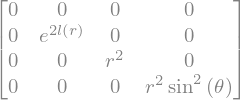

In [8]:
hdd=pt.ten('hdd',2)
#hdd.assign(g("_a,_b")+Vd('_a')*Vd('_b') ,"_a,_b")
hdd.assign(Kd('_a')*Kd('_b')+Ld('_a')*Ld('_b')+Sd('_a')*Sd('_b'),'_a,_b' )
hdd.simplify()
hdd.complete('_,_')
hdd.display('_,_')

In [9]:
Chr= pt.christoffel()

<IPython.core.display.Latex object>

  0%|          | 0/64 [00:00<?, ?it/s]

In [10]:
# Tensor de Riemann
R = pt.riemann(All=True)
R.simplify

<IPython.core.display.Latex object>

  0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{_\alpha}{_\beta}{_\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{^\alpha}{^\beta}{_\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{^\alpha}{^\beta}{^\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{^\alpha}{^\beta}{^\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{^\alpha}{^\beta}{_\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{^\alpha}{_\beta}{^\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{^\alpha}{_\beta}{^\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{^\alpha}{_\beta}{_\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{_\alpha}{^\beta}{_\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{_\alpha}{^\beta}{^\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{_\alpha}{^\beta}{^\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{_\alpha}{^\beta}{_\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{_\alpha}{_\beta}{^\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{_\alpha}{_\beta}{^\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{_\alpha}{_\beta}{_\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

<bound method Tensor.simplify of Riemann tensor defined>

In [11]:
# Tensor de Ricci
Ric = pt.ricci(All=True)

<IPython.core.display.Latex object>

  0%|          | 0/16 [00:00<?, ?it/s]

Ricci Tensor $R{^\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Ricci Tensor $R{^\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Ricci Tensor $R{_\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

  0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

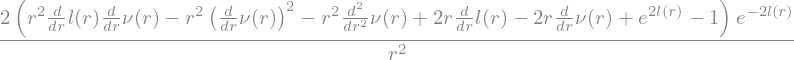

In [12]:
# Escalar de Ricci
RicS = pt.riccis()
RicS.simplify()

In [13]:
# Tensor de Einstein
G = pt.einstein(All=True)
G.simplify()
#G.display(aslist=True)

<IPython.core.display.Latex object>

  0%|          | 0/16 [00:00<?, ?it/s]

Einstein Tensor $G{^\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Einstein Tensor $G{^\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Einstein Tensor $G{_\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

$$
C_{a b c d}=  R_{a b c d} - g_{a[c} R_{d] b} + g_{b[c} R_{d] a}  + \frac{1}{3} R g_{a[c} g_{d] b}
$$

Elements assigned correctly to the _a,_b,_c,_d components


Wy Tensor $Wy{^\alpha}{_\beta}{_\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Wy Tensor $Wy{^\alpha}{^\beta}{_\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Wy Tensor $Wy{^\alpha}{^\beta}{^\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Wy Tensor $Wy{^\alpha}{^\beta}{^\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Wy Tensor $Wy{^\alpha}{^\beta}{_\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Wy Tensor $Wy{^\alpha}{_\beta}{^\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Wy Tensor $Wy{^\alpha}{_\beta}{^\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Wy Tensor $Wy{^\alpha}{_\beta}{_\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Wy Tensor $Wy{_\alpha}{^\beta}{_\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Wy Tensor $Wy{_\alpha}{^\beta}{^\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Wy Tensor $Wy{_\alpha}{^\beta}{^\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Wy Tensor $Wy{_\alpha}{^\beta}{_\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Wy Tensor $Wy{_\alpha}{_\beta}{^\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Wy Tensor $Wy{_\alpha}{_\beta}{^\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Wy Tensor $Wy{_\alpha}{_\beta}{_\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

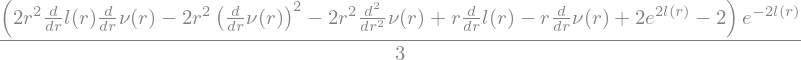

In [14]:
Wy= pt.ten('Wy',4)
Wy.assign( R('_a,_b,_c,_d') - (g('_a,_c')*Ric('_d,_b') - g('_a,_d')*Ric('_c,_b'))/2 + \
                              (g('_b,_c')*Ric('_d,_a') - g('_b,_d')*Ric('_c,_a'))/2 + \
            (RicS*(g('_a,_c')*g('_d,_b')- g('_a,_d')*g('_c,_b')))/3 , '_a,_b,_c,_d') 
Wy.simplify()
Wy.complete('_,_,_,_')
Wy('^3,_2,_3,_2')

The first set equations can be considered purely geometrical and emerges from the projection of the Riemann tensor along the tetrad i.e.
$$
2 V_{\alpha ;[\beta ; \gamma]}=R_{\delta \alpha \beta \gamma} V^{\delta}, \quad 2 K_{\alpha ;[\beta ; \gamma]}=R_{\delta \alpha \beta \gamma} K^{\delta}, \quad 2 L_{\alpha ;[\beta ; \gamma]}=R_{\delta \alpha \beta \gamma} L^{\delta} \quad \text { and } \quad 2 S_{\alpha ;[\beta ; \gamma]}=R_{\delta \alpha \beta \gamma} S^{\delta}
$$

In [15]:
# Esto es una verificacion
DeVddd = pt.ten("DeVddd",3)
DeVddd.assign(R("_a,_b,_c,_d")*Vu("^a"),"_b,_c,_d")
DeVddd.simplify()
#DeVddd.display('_,_,_')
IzVddd = pt.ten("IzVddd",3)
IzVddd.assign((pt.C(pt.C(Vd("_a"),"_b"),"_c") - pt.C(pt.C(Vd("_a"),"_c"),"_b")),"_a,_b,_c")
IzVddd.simplify()
#IzVddd.display('_,_,_')
ceros=pt.ten("ceros",3)
ceros.assign(IzVddd('_a,_b,_c')-DeVddd('_a,_b,_c') ,"_a,_b,_c")
ceros.simplify()
ceros.display('_,_,_')

Elements assigned correctly to the _b,_c,_d components
Elements assigned correctly to the _a,_b,_c components
Elements assigned correctly to the _a,_b,_c components
All components are zero


In [16]:
# Verificacion
DcRdddd1 = pt.ten("DcRdddd1",5)
DcRdddd1_dat = pt.C(R("_a,_b,_c,_d"),"_e") 
DcRdddd1.assign(DcRdddd1_dat,"_a,_b,_c,_d,_e")

DcRdddd2 = pt.ten("DcRdddd2",5)
DcRdddd2_dat = pt.C(R("_a,_b,_e,_c"),"_d") 
DcRdddd2.assign(DcRdddd2_dat,"_a,_b,_e,_c,_d")

DcRdddd3 = pt.ten("DcRdddd3",5)
DcRdddd3_dat = pt.C(R("_a,_b,_d,_e"),"_c") 
DcRdddd3.assign(DcRdddd3_dat,"_a,_b,_d,_e,_c")

Bianchi= pt.ten("Bianchi",5)
Bianchi.assign(DcRdddd1('_a,_b,_c,_d,_e')+DcRdddd2('_a,_b,_e,_c,_d')+DcRdddd3('_a,_b,_d,_e,_c'),"_a,_b,_c,_d,_e")

Bianchi.factor()
Bianchi.display()

Elements assigned correctly to the _a,_b,_c,_d,_e components
Elements assigned correctly to the _a,_b,_e,_c,_d components
Elements assigned correctly to the _a,_b,_d,_e,_c components
Elements assigned correctly to the _a,_b,_c,_d,_e components
All components are zero


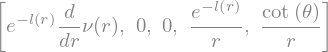

In [17]:
a1= A.diff(r)/(A*B)

sigma1= B.diff(t)/(A*B)
sigma2= C.diff(t)/(A*C)

J1=C.diff(r)/(C*B)
J2=sy.cot(theta)/C
[a1,sigma1,sigma2,J1,J2]

### COVARIANT DERIVATIVE OF $V_{\alpha}$
$$
V_{\alpha ; \beta}
$$


Elements assigned correctly to the _a,_b components


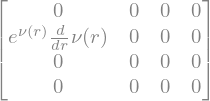

DcVd Tensor $DcVd{^\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

DcVd Tensor $DcVd{^\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

DcVd Tensor $DcVd{_\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

In [18]:
DcVd = pt.ten("DcVd",2)
DcVd_dat = pt.C(Vd("_a"),"_b") 
DcVd.assign(DcVd_dat,"_a,_b")
DcVd.factor()
DcVd.display()
DcVd.complete('_,_')

In [19]:
DcVdS = pt.ten('DcVdS',2)
DcVdS.assign(-a1*Kd('_a')*Vd('_b')+ sigma1*Kd('_a')*Kd('_b')+ sigma2*(Ld('_a')*Ld('_b')+Sd('_a')*Sd('_b')) ,"_a,_b")
#DcVdS.display('_,_')

Elements assigned correctly to the _a,_b components


Elements assigned correctly to the _a,_b components


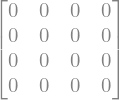

In [20]:
# Verificcion
ceros1=pt.ten('ceros1',2)
ceros1.assign(DcVd('_a,_b')-DcVdS('_a,_b') ,"_a,_b")
ceros1.simplify()
ceros1.display('_,_')

$$
a_{\alpha}=V^{\beta} V_{\alpha ; \beta}\,, \quad a_{\alpha;\beta}
$$

Elements assigned correctly to the _a components


ad Tensor $ad{^\alpha}$:   0%|          | 0/4 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

Elements assigned correctly to the _a,_b components


Dcad Tensor $Dcad{^\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Dcad Tensor $Dcad{^\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Dcad Tensor $Dcad{_\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

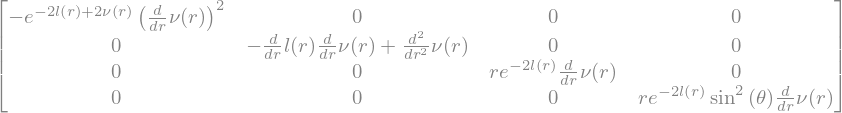

In [21]:
# Aceleracion y su derivada covariante
ad= pt.ten("ad",1)
ad.assign( DcVd("_a,_b")*Vu("^b") ,"_a")
ad.complete('_')
ad.simplify()

Dcad = pt.ten("Dcad",2)
Dcad_dat = pt.C(ad("_a"),"_b") 
Dcad.assign(Dcad_dat,"_a,_b")
Dcad.complete('_,_')
Dcad.simplify()
Dcad.display()

Elements assigned correctly to the ^a,_b components


Dcau Tensor $Dcau{_\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Dcau Tensor $Dcau{^\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Dcau Tensor $Dcau{_\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

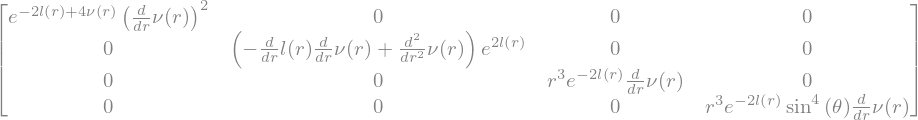

In [22]:
Dcau = pt.ten('Dcau',2)
Dcau_dat = pt.C(ad('^a'),'_b') 
Dcau.assign(Dcad_dat,'^a,_b')
Dcau.complete('^,_')
Dcau.simplify()
Dcau.display()

$$
\Theta=V_{; \alpha}^{\alpha}
$$

In [23]:
#Expansión
Theta=DcVd('^a,_a')
display(Theta)

Elements assigned correctly to the _a,_b components


sh Tensor $sh{^\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

sh Tensor $sh{^\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

sh Tensor $sh{_\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

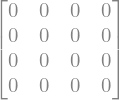

sh tensor defined

In [24]:
#Shear
sh=pt.ten('sh',2)
sh.assign( (DcVd('_a,_b')+DcVd('_b,_a'))/2 + (ad('_a')*Vd('_b')+ad('_b')*Vd('_a'))/2 - Theta*hdd('_a,_b')/3 ,"_a,_b")
sh.complete('_,_')
sh.simplify()
sh.display('_,_')
#sh= 1/A*(B.diff(t)/(B)-C.diff(t)/(C)  )
display(sh)

In [25]:
shes=3*sh('^a,^b')*sh('_a,_b')/2
shes

### COVARIANT DERIVATIVE OF: 
$$
K_{\alpha ; \beta}\,, \quad L_{\alpha ; \beta} \,, \quad S{\alpha ; \beta}
$$

In [26]:
DcKd = pt.ten("DcKd",2)
DcKd_dat = pt.C(Kd("_a"),"_b") 
DcKd.assign(DcKd_dat,"_a,_b")
DcKd.simplify()
DcKdS = pt.ten('DcKdS',2)
DcKdS.assign(-a1*Vd('_a')*Vd('_b')+ sigma1*Vd('_a')*Kd('_b')+ J1*(Ld('_a')*Ld('_b')+Sd('_a')*Sd('_b')) ,"_a,_b")
DcKdS.simplify()
#DcKdS.display('_,_')

DcLd = pt.ten("DcLd",2)
DcLd_dat = pt.C(Ld("_a"),"_b") 
DcLd.assign(DcLd_dat,"_a,_b")
DcLd.simplify()
DcLdS = pt.ten('DcLdS',2)
DcLdS.assign(sigma2*Vd('_a')*Ld('_b')- J1*Kd('_a')*Ld('_b')+ J2*Sd('_a')*Sd('_b') ,"_a,_b")
DcLdS.simplify()
#DcLdS.display('_,_')

DcSd = pt.ten("DcSd",2)
DcSd_dat = pt.C(Sd("_a"),"_b") 
DcSd.assign(DcSd_dat,"_a,_b")
DcSd.factor()
DcSdS = pt.ten('DcSdS',2)
DcSdS.assign(sigma2*Vd('_a')*Sd('_b')- J1*Kd('_a')*Sd('_b')- J2*Ld('_a')*Sd('_b') ,"_a,_b")
DcSdS.simplify()
#DcSdS.display('_,_')


Elements assigned correctly to the _a,_b components
Elements assigned correctly to the _a,_b components
Elements assigned correctly to the _a,_b components
Elements assigned correctly to the _a,_b components
Elements assigned correctly to the _a,_b components
Elements assigned correctly to the _a,_b components


Elements assigned correctly to the _a,_b components


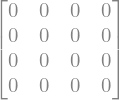

In [27]:
# Verificacion
ceros2=pt.ten('ceros2',2)
ceros2.assign(DcKd('_a,_b')-DcKdS('_a,_b') ,"_a,_b")
ceros2.simplify()
ceros2.display('_,_')

Elements assigned correctly to the _a,_b components


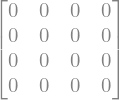

In [28]:
# Verificacion
ceros3=pt.ten('ceros3',2)
ceros3.assign(DcLd('_a,_b')-DcLdS('_a,_b') ,"_a,_b")
ceros3.simplify()
ceros3.display('_,_')

Elements assigned correctly to the _a,_b components


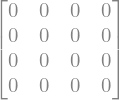

In [29]:
# Verificacion
ceros4=pt.ten('ceros4',2)
ceros4.assign(DcSd('_a,_b')-DcSdS('_a,_b') ,"_a,_b")
ceros4.simplify()
ceros4.display('_,_')

### The directional derivatives operators
$$
f^{\bullet}=V^{\alpha} \partial_{\alpha} f \quad f^{\dagger}=K^{\alpha} \partial_{\alpha} f \quad \text { and } \quad f^{*}=L^{\alpha} \partial_{\alpha} f
$$

Elements assigned correctly to the _a components
Elements assigned correctly to the _a components
Elements assigned correctly to the _a components


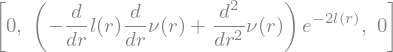

In [30]:
# Derivadas de a1
Da1c= pt.ten('Da1c',1)
Da1c.assign(pt.D(a1,"_a"), "_a")
Da1c.simplify()
Da1cir= Vu('^a')*Da1c('_a') 
Da1cir.simplify()

Da1= pt.ten('Da1',1)
Da1.assign(pt.D(a1,"_a"), "_a")
Da1.simplify()
Da1dag= Ku('^a')*Da1('_a') 
Da1dag.factor()

Da1es= pt.ten('Da1est',1)
Da1es.assign(pt.D(a1,"_a"), "_a")
Da1es.simplify()
Da1est= Lu('^a')*Da1es('_a') 
Da1est.simplify()

[Da1cir, Da1dag, Da1est]

## The energy momentum tensor
$$
{T}_{\alpha\beta}= (\rho+P) V_\alpha V_\beta+P g _{\alpha \beta} +\Pi_{\alpha \beta}+\mathcal{F}_\alpha V_\beta+\mathcal{F}_\beta V_\alpha .
$$

$$
\mathcal{F}_{\mu}=\mathcal{F} K_{\mu}
$$

In [31]:
Fd=pt.ten('Fd',1)
Fd.assign(F*Kd('_a') ,"_a")
Fd.simplify()
Fd.display('_')
Fd.complete('_')

Elements assigned correctly to the _a components


Fd Tensor $Fd{^\alpha}$:   0%|          | 0/4 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

$$
\mathcal{F}^{\mu} V_{\mu}=0
$$

In [32]:
Fd("^a")*Vd("_a")

Elements assigned correctly to the _a,_b components


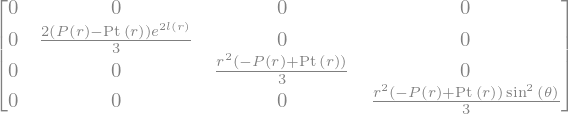

In [33]:
PIdd=pt.ten('PIdd',2)
PIdd.assign(Delta*(Kd("_a")*Kd("_b")-hdd("_a,_b")/3) ,"_a,_b")
PIdd.simplify()
PIdd.display('_,_')

Elements assigned correctly to the _a,_b components


T Tensor $T{^\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

T Tensor $T{^\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

T Tensor $T{_\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

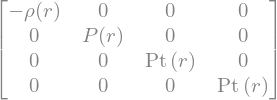

In [34]:
T = pt.ten('T',2)
T.assign((rho+P)*Vd("_a")*Vd("_b") + P*g("_a,_b") + PIdd("_a,_b") + Fd("_a")*Vd("_b") + Fd("_b")*Vd("_a") ,"_a,_b")
T.simplify()
T.complete('_,_')
T.display('^,_')

In [35]:
TOV = pt.ten('TOV',1)
val = pt.C(T("^a,^b"),"_b")
TOV.assign(val,"^a")
TOV.simplify()
TOV.complete('^')
#TOV.display(aslist=True)

Elements assigned correctly to the ^a components


TOV Tensor $TOV{_\alpha}$:   0%|          | 0/4 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

In [36]:
TOV1=TOV("_0")
TOV1.factor()

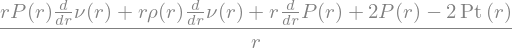

In [37]:
TOV2=TOV("_1")
TOV2.factor()
#print_python(TOV2)

In [38]:
T("_a,_b")*Vu('^a')*Vu('^b')

In [39]:
Fdp=pt.ten('Fdp',1)
Fdp.assign(-rho*Vd('_a') -T("_a,_b")*Vu('^b') ,"_a")
Fdp.simplify()
Fdp.display('_')

Elements assigned correctly to the _a components


$$
\Pi_{\alpha \beta}=h_\alpha^\mu h_\beta^\nu\left(T_{\mu \nu}-P h_{\mu \nu}\right)
$$

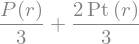

In [40]:
hdd("^a,^b")*T("_a,_b")/3

Elements assigned correctly to the _a,_b components


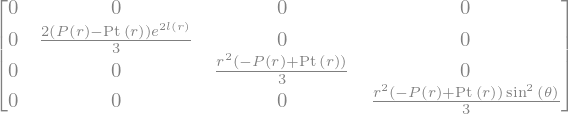

In [41]:
PI2=pt.ten('PI2',2)
PI2.assign(hdd("_a,^c")*hdd("_b,^d")*(T("_c,_d") - P*hdd("_c,_d") ),"_a,_b")
PI2.simplify()
PI2.display()

## The splitting of the Riemann tensor and structure scalars

A set of scalar functions --the structure scalars--  obtained from the orthogonal splitting of the Riemann tensor


We can express the splitting of the Riemann tensor as:
$$
R_{\alpha \beta \mu \nu}=2V_\mu V_{[\alpha}Y_{\beta] \, \nu}+2h_{\alpha[\nu}X_{\mu] \,  \beta}+2V_\nu V_{[\beta}Y_{\alpha] \, \mu}
+ h_{\beta\nu}(X_0 \, h_{\alpha\mu}-X_{\alpha\mu})+h_{\beta\mu}(X_{\alpha\nu} -X_0 \, h_{\alpha\nu})
$$

$$
 + 2V_{[\nu} Z_{ \, \mu]}^{\gamma}\varepsilon_{{\alpha \beta \gamma}} +2V_{[\beta} Z_{{\,  \ \alpha]}}^{{\gamma }}\ \varepsilon_{{\mu \nu \gamma}} \,,
$$

with $\varepsilon_{\mu \nu \gamma} = \eta_{\phi \mu \nu \gamma} V^{\phi}$, and  $ \eta_{\phi \mu \nu \gamma}$ the Levi-Civita 4-tensor. 


In [42]:
Y0=4*sy.pi*(rho+3*P)
Y1=E-4*sy.pi*Delta
X0=8*sy.pi*rho
X1=-(E+4*sy.pi*Delta)
Z=4*sy.pi*F

Elements assigned correctly to the _a,_b components


Ydd Tensor $Ydd{^\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Ydd Tensor $Ydd{^\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Ydd Tensor $Ydd{_\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

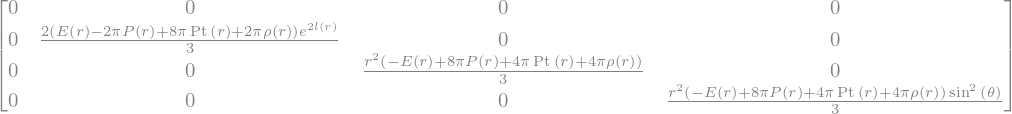

In [43]:
Ydd= pt.ten('Ydd',2)
Ydd.assign(Y0*hdd("_a,_b")/3 + Y1*(Kd('_a')*Kd('_b') - hdd("_a,_b")/3) ,"_a,_b")
Ydd.simplify()
Ydd.complete('_,_')
Ydd.display('_,_')

Elements assigned correctly to the _a,_b components


Xdd Tensor $Xdd{^\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Xdd Tensor $Xdd{^\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Xdd Tensor $Xdd{_\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

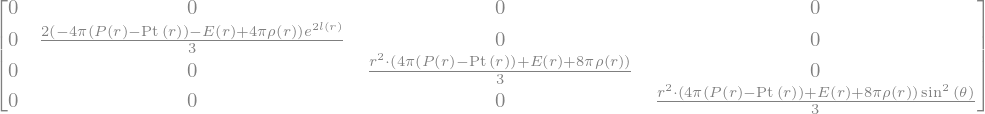

In [44]:
Xdd= pt.ten('Xdd',2)
Xdd.assign(X0*hdd("_a,_b")/3 + X1*(Kd('_a')*Kd('_b')-hdd("_a,_b")/3) ,"_a,_b")
Xdd.simplify()
Xdd.complete('_,_')
Xdd.display('_,_')

Elements assigned correctly to the _a,_b components


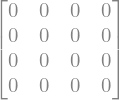

Zdd Tensor $Zdd{^\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Zdd Tensor $Zdd{^\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Zdd Tensor $Zdd{_\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

In [45]:
Zdd= pt.ten('Zdd',2)
Zdd.assign(Z*(Ld('_a')*Sd('_b')-Ld('_b')*Sd('_a')) ,"_a,_b")
Zdd.simplify()
Zdd.display('_,_')
Zdd.complete('_,_')
Zdd.simplify()

In [46]:
LC = pt.lcivita(convention=1)
eddd= pt.ten('eddd',3)
eddd.assign(LC('_a,_b,_c,_d')*Vu('^a'), "_b,_c,_d")
eddd.simplify()
eddd('_1,_2,_3')

Elements assigned correctly to the _b,_c,_d components


In [47]:
Rdddd= pt.ten('Rdddd',4)
Rdddd.assign(Vd('_c')*Vd('_a')*Ydd('_b,_d')-Vd('_c')*Vd('_b')*Ydd('_a,_d') + \
             Vd('_d')*Vd('_b')*Ydd('_a,_c')-Vd('_d')*Vd('_a')*Ydd('_b,_c') + \
             hdd("_a,_d")*Xdd('_c,_b')- hdd("_a,_c")*Xdd('_d,_b') +\
             hdd("_b,_d")*(X0*hdd("_a,_c")-Xdd('_a,_c') ) + \
             hdd("_b,_c")*(Xdd('_a,_d')-X0*hdd("_a,_d") ) + \
             Vd('_d')*Zdd('^e,_c')*eddd("_a,_b,_e")- Vd('_c')*Zdd('^e,_d')*eddd("_a,_b,_e") + 
             Vd('_b')*Zdd('^e,_a')*eddd("_c,_d,_e")- Vd('_a')*Zdd('^e,_b')*eddd("_c,_d,_e") , "_a,_b,_c,_d")
Rdddd.simplify()
#Rdddd.display('_,_,_,_')
Rdddd.complete('_,_,_,_')

Elements assigned correctly to the _a,_b,_c,_d components


Rdddd Tensor $Rdddd{^\alpha}{_\beta}{_\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Rdddd Tensor $Rdddd{^\alpha}{^\beta}{_\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Rdddd Tensor $Rdddd{^\alpha}{^\beta}{^\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Rdddd Tensor $Rdddd{^\alpha}{^\beta}{^\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Rdddd Tensor $Rdddd{^\alpha}{^\beta}{_\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Rdddd Tensor $Rdddd{^\alpha}{_\beta}{^\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Rdddd Tensor $Rdddd{^\alpha}{_\beta}{^\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Rdddd Tensor $Rdddd{^\alpha}{_\beta}{_\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Rdddd Tensor $Rdddd{_\alpha}{^\beta}{_\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Rdddd Tensor $Rdddd{_\alpha}{^\beta}{^\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Rdddd Tensor $Rdddd{_\alpha}{^\beta}{^\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Rdddd Tensor $Rdddd{_\alpha}{^\beta}{_\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Rdddd Tensor $Rdddd{_\alpha}{_\beta}{^\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Rdddd Tensor $Rdddd{_\alpha}{_\beta}{^\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Rdddd Tensor $Rdddd{_\alpha}{_\beta}{_\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

Elements assigned correctly to the _a,_c components


Rdd Tensor $Rdd{^\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Rdd Tensor $Rdd{^\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Rdd Tensor $Rdd{_\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

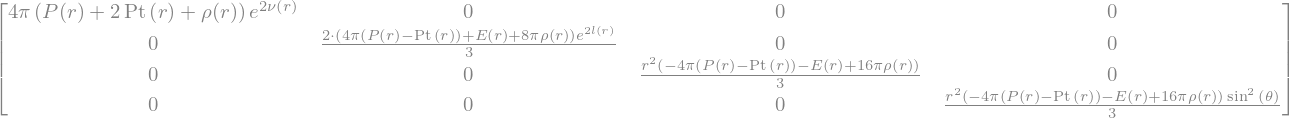

In [48]:
Rdd= pt.ten('Rdd',2)
Rdd.assign(Y0*Vd('_a')*Vd('_c') - Xdd('_a,_c') + X0*hdd("_a,_c") +\
           Zdd('^d,^b')*eddd("_c,_d,_b")*Vd('_a') + \
           Vd('_c')*Zdd('^d,^b')*eddd("_a,_d,_b"), "_a,_c")
Rdd.complete('_,_')    
Rdd.simplify()
Rdd.display('_,_')

In [49]:
Rs=Rdddd('_a,_b,^a,_d')*g('^b,^d')
Rs.simplify()

In [50]:
simplify(6*X0-4*Xdd(('^a,_a'))-2*Ydd(('^a,_a')))

Elements assigned correctly to the _a,_b,_c,_d components


Cdddd Tensor $Cdddd{^\alpha}{_\beta}{_\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Cdddd Tensor $Cdddd{^\alpha}{^\beta}{_\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Cdddd Tensor $Cdddd{^\alpha}{^\beta}{^\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Cdddd Tensor $Cdddd{^\alpha}{^\beta}{^\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Cdddd Tensor $Cdddd{^\alpha}{^\beta}{_\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Cdddd Tensor $Cdddd{^\alpha}{_\beta}{^\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Cdddd Tensor $Cdddd{^\alpha}{_\beta}{^\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Cdddd Tensor $Cdddd{^\alpha}{_\beta}{_\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Cdddd Tensor $Cdddd{_\alpha}{^\beta}{_\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Cdddd Tensor $Cdddd{_\alpha}{^\beta}{^\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Cdddd Tensor $Cdddd{_\alpha}{^\beta}{^\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Cdddd Tensor $Cdddd{_\alpha}{^\beta}{_\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Cdddd Tensor $Cdddd{_\alpha}{_\beta}{^\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Cdddd Tensor $Cdddd{_\alpha}{_\beta}{^\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Cdddd Tensor $Cdddd{_\alpha}{_\beta}{_\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

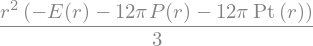

In [51]:
Cdddd= pt.ten('Cdddd',4)
Cdddd.assign(Rdddd('_a,_b,_c,_d') - (g('_a,_c')*Rdd('_d,_b') - g('_a,_d')*Rdd('_c,_b'))/2 + \
                                    (g('_b,_c')*Rdd('_d,_a') - g('_b,_d')*Rdd('_c,_a'))/2 + \
            (Rs*(g('_a,_c')*g('_d,_b')- g('_a,_d')*g('_c,_b')))/3 , '_a,_b,_c,_d') 
Cdddd.simplify()
Cdddd.complete('_,_,_,_')
Cdddd('^3,_2,_3,_2')

Elements assigned correctly to the _a,_b components


Edd Tensor $Edd{^\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Edd Tensor $Edd{^\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Edd Tensor $Edd{_\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

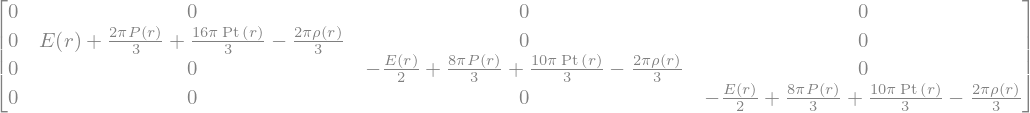

In [52]:
Edd=pt.ten('Edd',2)
Edd.assign( Cdddd('_a,_c,_b,_d')*Vu('^c')*Vu('^d') ,'_a,_b')
Edd.complete('_,_')
Edd.simplify()
Edd.display('^,_')

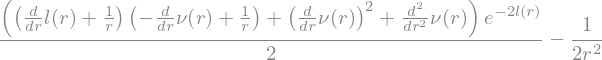

In [53]:
Ec=1/(2*A**2)*( C.diff(t,t)/(C)- B.diff(t,t)/(B) - (C.diff(t)/(C)-B.diff(t)/(B))*(A.diff(t)/(A)-C.diff(t)/(C))  ) + \
    + 1/(2*B**2)*( A.diff(r,r)/(A)- C.diff(r,r)/(C) + (B.diff(r)/(B)+C.diff(r)/(C))*(C.diff(r)/(C)-A.diff(r)/(A))) - 1/(2*C**2)
Ec

Elements assigned correctly to the _a,_b components


Edd2 Tensor $Edd2{^\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Edd2 Tensor $Edd2{^\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Edd2 Tensor $Edd2{_\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

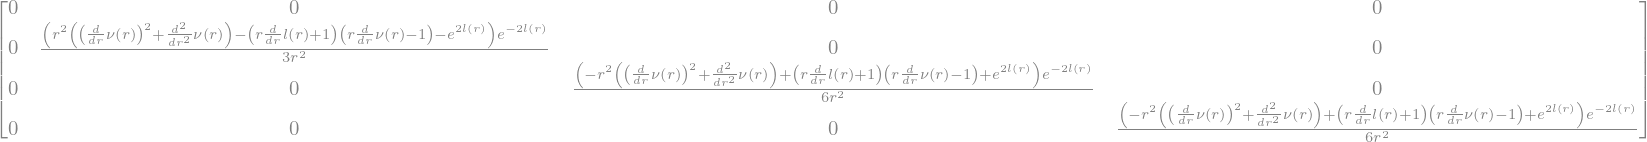

In [54]:
Edd2=pt.ten('Edd2',2)
Edd2.assign( Ec*(Kd("_a")*Kd("_b")-hdd("_a,_b")/3) ,'_a,_b')
Edd2.complete('_,_')
Edd2.simplify()
Edd2.display('^,_')

Elements assigned correctly to the _a,_b components


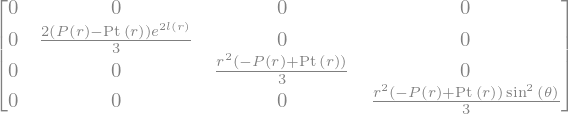

In [55]:
PI2=pt.ten('PI2',2)
PI2.assign(-1/(8*sy.pi)*(X1+Y1)*(Kd("_a")*Kd("_b")-hdd("_a,_b")/3) ,"_a,_b")
PI2.simplify()
PI2.display('_,_')

## Projections of Riemann tensor

$$
f^{\bullet} = V^{\alpha} \partial_{\alpha}f ; \quad f^{{\rm t}} = K^{\alpha} \partial_{\alpha}f  \quad \mathrm{and} \quad f^{\ast} = L^{\alpha}\partial_{\alpha}f
$$

$$
\sigma^{\bullet}_{1} -a_1^{{\rm t}} -a_1^2+\sigma_1^2 = -\frac{1}{3}(Y_0+2Y_1) \qquad (25)
$$

Elements assigned correctly to the _a components


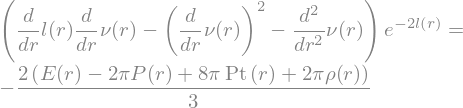

In [56]:
Dsigma1= pt.ten('Dsigma1',1)
Dsigma1.assign(pt.D(sigma1,"_a"), "_a")
Dsigma1.simplify()
Dsigma1P= Vu('^a')*Dsigma1('_a') 
#pt.display(Dsigma1P)
Dsigma1dag= Ku('^a')*Dsigma1('_a') 
#Dsigma1dag
eq25= Eq(pt.factor(Dsigma1P - Da1dag - a1**2 + sigma1**2) ,-pt.factor(Y0+2*Y1)/3)
eq25

$$
\sigma^{\bullet}_{2} +\sigma_2^2-a_1J_1 = \frac{1}{3}(Y_1-Y_0) \qquad (26)
$$

Elements assigned correctly to the _a components


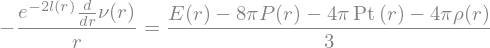

In [57]:
Dsigma2= pt.ten('Dsigma2',1)
Dsigma2.assign(pt.D(sigma2,"_a"), "_a")
Dsigma2.simplify()
Dsigma2P= Vu('^a')*Dsigma2('_a') 
#pt.display(Dsigma2P)
Dsigma2dag= Ku('^a')*Dsigma2('_a') 
#Dsigma2dag
eq26= Eq(pt.factor(Dsigma2P +sigma2**2 -a1*J1) , pt.factor((Y1-Y0)/3))
eq26

$$
\sigma_2^{{\rm t}}+J_1(\sigma_2-\sigma_1)=-Z \qquad (27)
$$

In [58]:
eq27= Eq(pt.simplify(Dsigma2dag + J1*(sigma2-sigma1)) , - Z )
eq27

$$
J^{\bullet}_{1} +J_1\sigma_2-a_1\sigma_2 = -Z \qquad (28)
$$

In [59]:
DJ1= pt.ten('DJ1',1)
DJ1.assign(pt.D(J1,"_a"), "_a")
DJ1.simplify()
DJ1P= Vu('^a')*DJ1('_a') 
#pt.display(DJ1P)
DJ1dag= Ku('^a')*DJ1('_a') 
#DJ1dag
eq28= Eq(pt.factor(DJ1P + J1*sigma2 - a1*sigma2) ,-Z )
eq28

Elements assigned correctly to the _a components


$$
J_1^{{\rm t}}+J_1^2-\sigma_1 \sigma_2 = \frac{1}{3}(X_1-X_0) \qquad (29)
$$

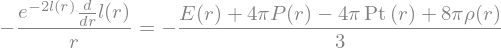

In [60]:
eq29= Eq(pt.factor(DJ1dag + J1**2 - sigma2*sigma1) , pt.factor((X1-X0)/3))
eq29

$$
J^{\bullet}_{2} +J_2\sigma_2 = 0  \qquad (30)
$$

In [61]:
DJ2= pt.ten('DJ2',1)
DJ2.assign(pt.D(J2,"_a"), "_a")
DJ2.simplify()
DJ2P= Vu('^a')*DJ2('_a') 
#pt.display(DJ2P)
DJ2dag= Ku('^a')*DJ2('_a') 
#DJ2dag
eq30= Eq(pt.simplify(DJ2P + J2*sigma2) ,0)
eq30

Elements assigned correctly to the _a components


$$
J_2^{{\rm t}} +J_1J_2 = 0   \qquad (31)
$$

In [62]:
eq31= Eq(pt.simplify(DJ2dag + J1*J2) ,0)
eq31

$$
J_1^2-\frac{1}{C^2}-\sigma_2^2 = -\frac{1}{3}(X_0+2X_1) \qquad (32)
$$

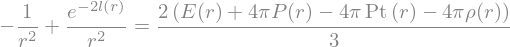

In [63]:
eq32= Eq(pt.simplify(J1**2 - 1/C**2 - sigma2**2), - pt.factor((X0+2*X1)/3) )
eq32

## Equations from Bianchi identities:
$$
\begin{array}{r}
a_1\left[-X_0+X_1-Y_0+Y_1\right]+3 J_1 Y_1+3 Z^{\bullet}+6 Z \sigma_1+3 Z \sigma_2-Y_0^{\dagger}+Y_1^{\dagger}=0 \,\, \text { (33) } \\
X_0^{\bullet}-X_1^{\bullet}-6 a_1 Z-3 J_1 Z+\left[Y_0-Y_1-X_1\right] \sigma_1+\left[Y_0+2 Y_1-X_1\right] \sigma_2+X_0\left[\sigma_1+\sigma_2\right]-3 Z^{\dagger}=0 \,\, \text { (34) } \\
X_0^{\bullet}+2 X_1^{\bullet}+2 X_0 \sigma_2-6 J_1 Z+\left[4 X_1+2 Y_0-2 Y_1\right] \sigma_2=0 \,\, \text { (35) } \\
X_0^{\dagger}+2 X_1^{\dagger}+6 J_1 X_1+6 Z \sigma_2=0 \,\, \text { (36) }
\end{array}
$$

In [64]:
DZ= pt.ten('DZ',1)
DZ.assign(pt.D(Z,"_a"), "_a")
DZ.simplify()
DZP= Vu('^a')*DZ('_a') 
#pt.display(DZP)
DZdag= Ku('^a')*DZ('_a') 
#DZdag

Elements assigned correctly to the _a components


In [65]:
DY0= pt.ten('DY0',1)
DY0.assign(pt.D(Y0,"_a"), "_a")
DY0.simplify()
DY0P= Vu('^a')*DY0('_a') 
#pt.display(DY0P)
DY0dag= Ku('^a')*DY0('_a') 
#DY0dag

Elements assigned correctly to the _a components


In [66]:
DY1= pt.ten('DY1',1)
DY1.assign(pt.D(Y1,"_a"), "_a")
DY1.simplify()
DY1P= Vu('^a')*DY1('_a') 
#pt.display(DY1P)
DY1dag= Ku('^a')*DY1('_a') 
#DY1dag

Elements assigned correctly to the _a components


In [67]:
DX0= pt.ten('DX0',1)
DX0.assign(pt.D(X0,"_a"), "_a")
DX0.simplify()
DX0P= Vu('^a')*DX0('_a') 
#pt.display(DX0P)
DX0dag= Ku('^a')*DX0('_a') 
#DX0dag

Elements assigned correctly to the _a components


In [68]:
DX1= pt.ten('DX1',1)
DX1.assign(pt.D(X1,"_a"), "_a")
DX1.simplify()
DX1P= Vu('^a')*DX1('_a') 
#pt.display(DX1P)
DX1dag= Ku('^a')*DX1('_a') 
#DX1dag

Elements assigned correctly to the _a components


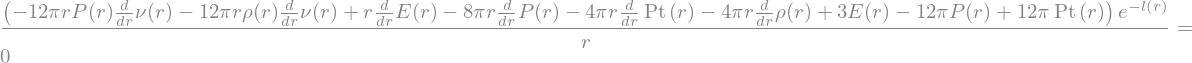

In [69]:
eq33= Eq(sy.factor(a1*(-X0+X1-Y0+Y1) + 3*J1*Y1 + 3*DZP + 6*Z*sigma1 + 3*Z*sigma2 - DY0dag + DY1dag ),0)
eq33

In [70]:
eq34=Eq(sy.simplify(DX0P-DX1P -6*a1*Z - 3*J1*Z + (Y0-Y1-X1)*sigma1 + (Y0+2*Y1-X1)*sigma2 +X0*(sigma1+sigma2)-3*DZdag ),0)
eq34

In [71]:
eq35= Eq(sy.simplify(DX0P+2*DX1P + 2*X0*sigma2 - 6*J1*Z + (4*X1+2*Y0-2*Y1)*sigma2  ) ,0)
eq35

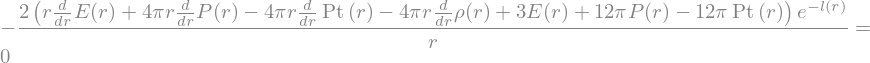

In [72]:
eq36= Eq(sy.factor(DX0dag + 2*DX1dag + 6*J1*X1 + 6*Z*sigma2),0)
eq36

## Non-Pascalian static fluids

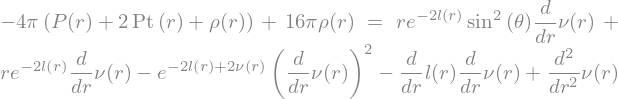

In [73]:
EE1= Eq(Rdd('^a,_a') , Dcau('^a,_a') )
EE1

Elements assigned correctly to the _a,_b components


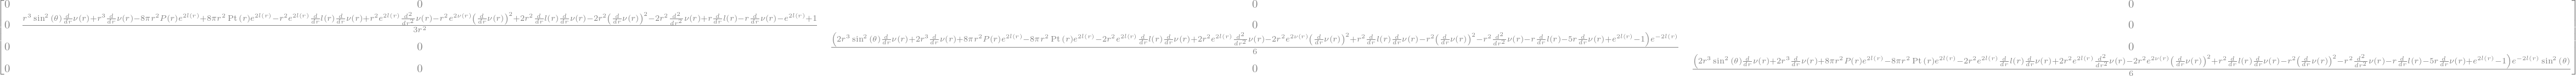

In [74]:
EE2dd=pt.ten('EE2dd',2)
EE2dd.assign( Edd2('_a,_b')-4*sy.pi*PIdd('_a,_b') - (ad('_a')*ad('_b') + (hdd('_a,^c')*hdd('_b,^d')+hdd('_b,^c')*hdd('_a,^d'))*Dcad('_d,_c')/2 \
     - Dcau('^c,_c')*hdd('_a,_b')/3)       ,'_a,_b') 
EE2dd.factor()
EE2dd.display('_,_')